In [9]:
import pandas as pd

In [11]:
dataset=pd.read_csv('Placement.csv')

In [12]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [13]:
Quan=[i for i in dataset.columns if dataset[i].dtype!='O']

In [14]:
Qual=[i for i in dataset.columns if dataset[i].dtype=='O']

In [23]:
Quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [16]:
Quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [17]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset[Quan])
df=imp.transform(dataset[Quan])
df=pd.DataFrame(df,columns=Quan)

In [18]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000


In [19]:
df.isnull().sum()

sl_no       0
ssc_p       0
hsc_p       0
degree_p    0
etest_p     0
mba_p       0
salary      0
dtype: int64

In [25]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(dataset[Qual])
df1=imp.transform(dataset[Qual])
df1=pd.DataFrame(df1,columns=Qual)

In [27]:
df1.isnull().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [28]:
newdataset=pd.concat([df,df1],axis=1)

In [29]:
newdataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [30]:
newdataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [33]:
newdataset.to_csv('PrePlacement.csv',index=False)

In [34]:
import seaborn as scs

C:\Users\mojayara\AppData\Local\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


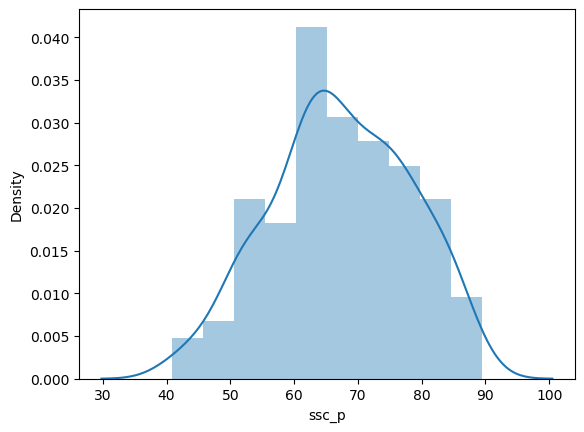

In [37]:
scs.distplot(newdataset['ssc_p'])

In [38]:
from matplotlib import pyplot

In [39]:
from scipy.stats import norm

In [40]:
import seaborn as sns

C:\Users\mojayara\AppData\Local\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


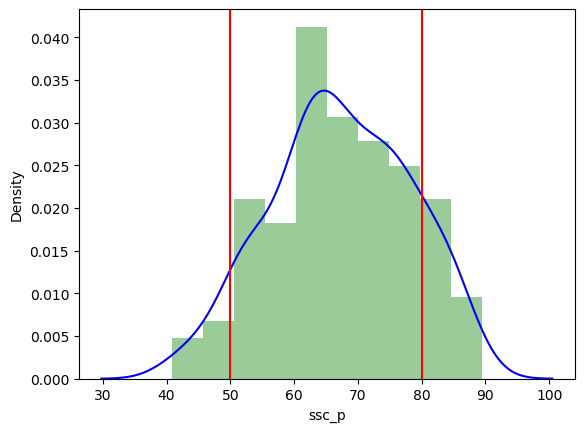

In [69]:
ax=sns.distplot(dataset['ssc_p'],kde=True,kde_kws={'color':'blue'},color='Green')
pyplot.axvline(50,color='Red')
pyplot.axvline(80,color='Red')

In [49]:
sample=dataset['ssc_p']

In [51]:
sample_mean=sample.mean()

In [52]:
sample_std=sample.std()

In [53]:
sample_mean

67.30339534883721

In [54]:
sample_std

10.827205398231452

In [56]:
dist=norm(sample_mean,sample_std)

In [57]:
dist

In [58]:
values=[i for i in range(50,80)]

In [60]:
problity=[dist.pdf(val) for val in values]

In [61]:
problity

[0.010275148846718499,
 0.011858764583155554,
 0.013570194930153937,
 0.015396713811418094,
 0.01732069447798158,
 0.019319588759641553,
 0.021366125100358083,
 0.023428741938312646,
 0.025472260251149254,
 0.027458784613159832,
 0.029348806868826963,
 0.031102471650606527,
 0.03268094966902733,
 0.034047854157679046,
 0.03517062909285573,
 0.036021835597530534,
 0.03658026570377481,
 0.03683182040123766,
 0.03677010122906173,
 0.03639668075742896,
 0.03572103599626337,
 0.034760148667713334,
 0.03353779587976735,
 0.03208357256215689,
 0.030431701757499416,
 0.028619699467069683,
 0.026686966567959873,
 0.024673381101605867,
 0.022617960162095187,
 0.0205576522540355]

In [62]:
prob=sum(problity)

In [63]:
prob

0.8201083468562449

In [123]:
def get_normal_distribution(dataset, startvalue, endvalue):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as scs
    aax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(50,color='Red')
    pyplot.axvline(80,color='Red')
    sample=dataset
    sample_mean=sample.mean()
    sample_dev=sample.std()
    print(f'Mean: {sample_mean} Deviation: {sample_dev}')
    distr=norm(sample_mean,sample_dev)
    values=[i for i in range(startvalue,endvalue)]
    prob=[distr.pdf(val) for val in values]
    probe=sum(prob)
    print(f'Probabitly: {probe}')
    return probe

In [124]:
dataset['ssc_p']

0      67.00
1      79.33
2      65.00
3      56.00
4      85.80
       ...  
210    80.60
211    58.00
212    67.00
213    74.00
214    62.00
Name: ssc_p, Length: 215, dtype: float64

Mean: 67.30339534883721 Deviation: 10.827205398231452
Probabitly: 0.8201083468562449


C:\Users\mojayara\AppData\Local\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


0.8201083468562449

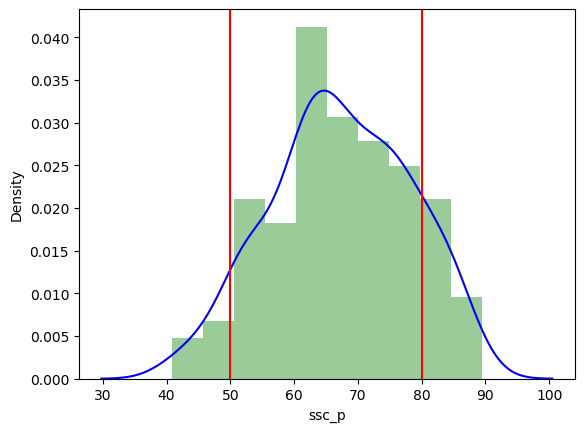

In [125]:
get_normal_distribution(dataset['ssc_p'], 50, 80)

In [114]:
# !pip install statsmodels

In [115]:
from statsmodels.distributions.empirical_distribution import ECDF

In [116]:
ecdf=ECDF(dataset['ssc_p'])

In [117]:
ecdf(80)

0.8651162790697674

In [118]:
def Standard_normal_distribution_graph(dataset):
    mean=dataset.mean()
    std_deviation=dataset.std()
    import seaborn as scs
    values=[data for data in dataset]
    z_score=[((j-mean)/std_deviation) for j in values]
    scs.distplot(z_score)

C:\Users\mojayara\AppData\Local\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


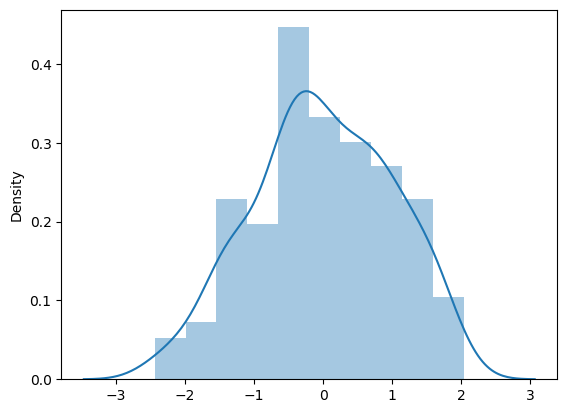

In [119]:
Standard_normal_distribution_graph(dataset['ssc_p'])